In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
index_path =  r"C:\web\data\corn\data_use\csv\all_index_19_10.xlsx"
data_path = r"C:\web\data\corn\data_use\csv\alldata_19_10.xlsx"

In [5]:
# df_data = pd.read_excel(data_path,usecols=['ID_Number','total_days_image_1','yield/hec'])
# df_VI = pd.read_excel(index_path)
# df_VI.rename(columns={'Unnamed: 0':'ID_Number'},inplace=True)

In [7]:
# df = df_VI.merge(df_data,left_on="ID_Number",right_on="ID_Number")
# df_wo_ID = df[[ 'msp_green', 'msp_nir', 'msp_red', 'msp_red_edge',
#        'red_rgb', 'green_rgb', 'blue_rgb', 'yield/hec', 'total_days_image_1']]



In [8]:
# df.to_excel(r"C:\web\data\corn\data_use\csv\data_merged_20190106.xlsx")
# df_wo_ID.to_excel(r"C:\web\data\corn\data_use\csv\data_merged_WOID_20190106.xlsx")

In [3]:
df_wo_ID = pd.read_excel(r"C:\web\data\corn\data_use\excel\20190106\data_merged_WOID_20190106.xlsx")

In [ ]:
df_wo_ID.corr()

,msp_green,msp_nir,msp_red,msp_red_edge,red_rgb,green_rgb,blue_rgb,yield/hec,total_days_image_1
msp_green,1.000000,-0.250274,0.914681,0.119647,0.632250,0.531281,0.606058,0.286299,-0.477224
msp_nir,-0.250274,1.000000,-0.437005,0.875005,-0.492531,-0.363380,-0.431592,-0.015435,0.280132
msp_red,0.914681,-0.437005,1.000000,-0.078818,0.734348,0.605635,0.692006,0.347638,-0.459751
msp_red_edge,0.119647,0.875005,-0.078818,1.000000,-0.254490,-0.174477,-0.237271,0.110040,0.118189
red_rgb,0.632250,-0.492531,0.734348,-0.254490,1.000000,0.975273,0.946116,0.386779,-0.535779
green_rgb,0.531281,-0.363380,0.605635,-0.174477,0.975273,1.000000,0.942532,0.389627,-0.489522
blue_rgb,0.606058,-0.431592,0.692006,-0.237271,0.946116,0.942532,1.000000,0.450452,-0.396378
yield/hec,0.286299,-0.015435,0.347638,0.110040,0.386779,0.389627,0.450452,1.000000,-0.147878
total_days_image_1,-0.477224,0.280132,-0.459751,0.118189,-0.535779,-0.489522,-0.396378,-0.147878,1.000000


In [ ]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    corr_r,p = stats.pearsonr(x,y)
    # Axes
    ax = plt.gca()
    ax.axis('off')
    x_min, x_max = ax.get_xlim()
    x_centroid = x_min + (x_max - x_min) / 2
    y_min, y_max = ax.get_ylim()
    y_centroid = y_min + (y_max - y_min) / 2
    # Plot args
    cmap = plt.cm.Greens if corr_r >= 0 else plt.cm.OrRd
    marker_size = abs(corr_r) * 7000
    marker_color = np.array([cmap(int(abs(corr_r) * 255))])
    ax.scatter(x_centroid, y_centroid, marker='o', s=marker_size, c=marker_color, alpha=0.6)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min,y_max])
    corr_text = str(round(corr_r, 2)).replace('-0', '-').lstrip('0')
    ax.annotate(corr_text, [x_centroid, y_centroid,], ha='center', va='center', fontsize=20)

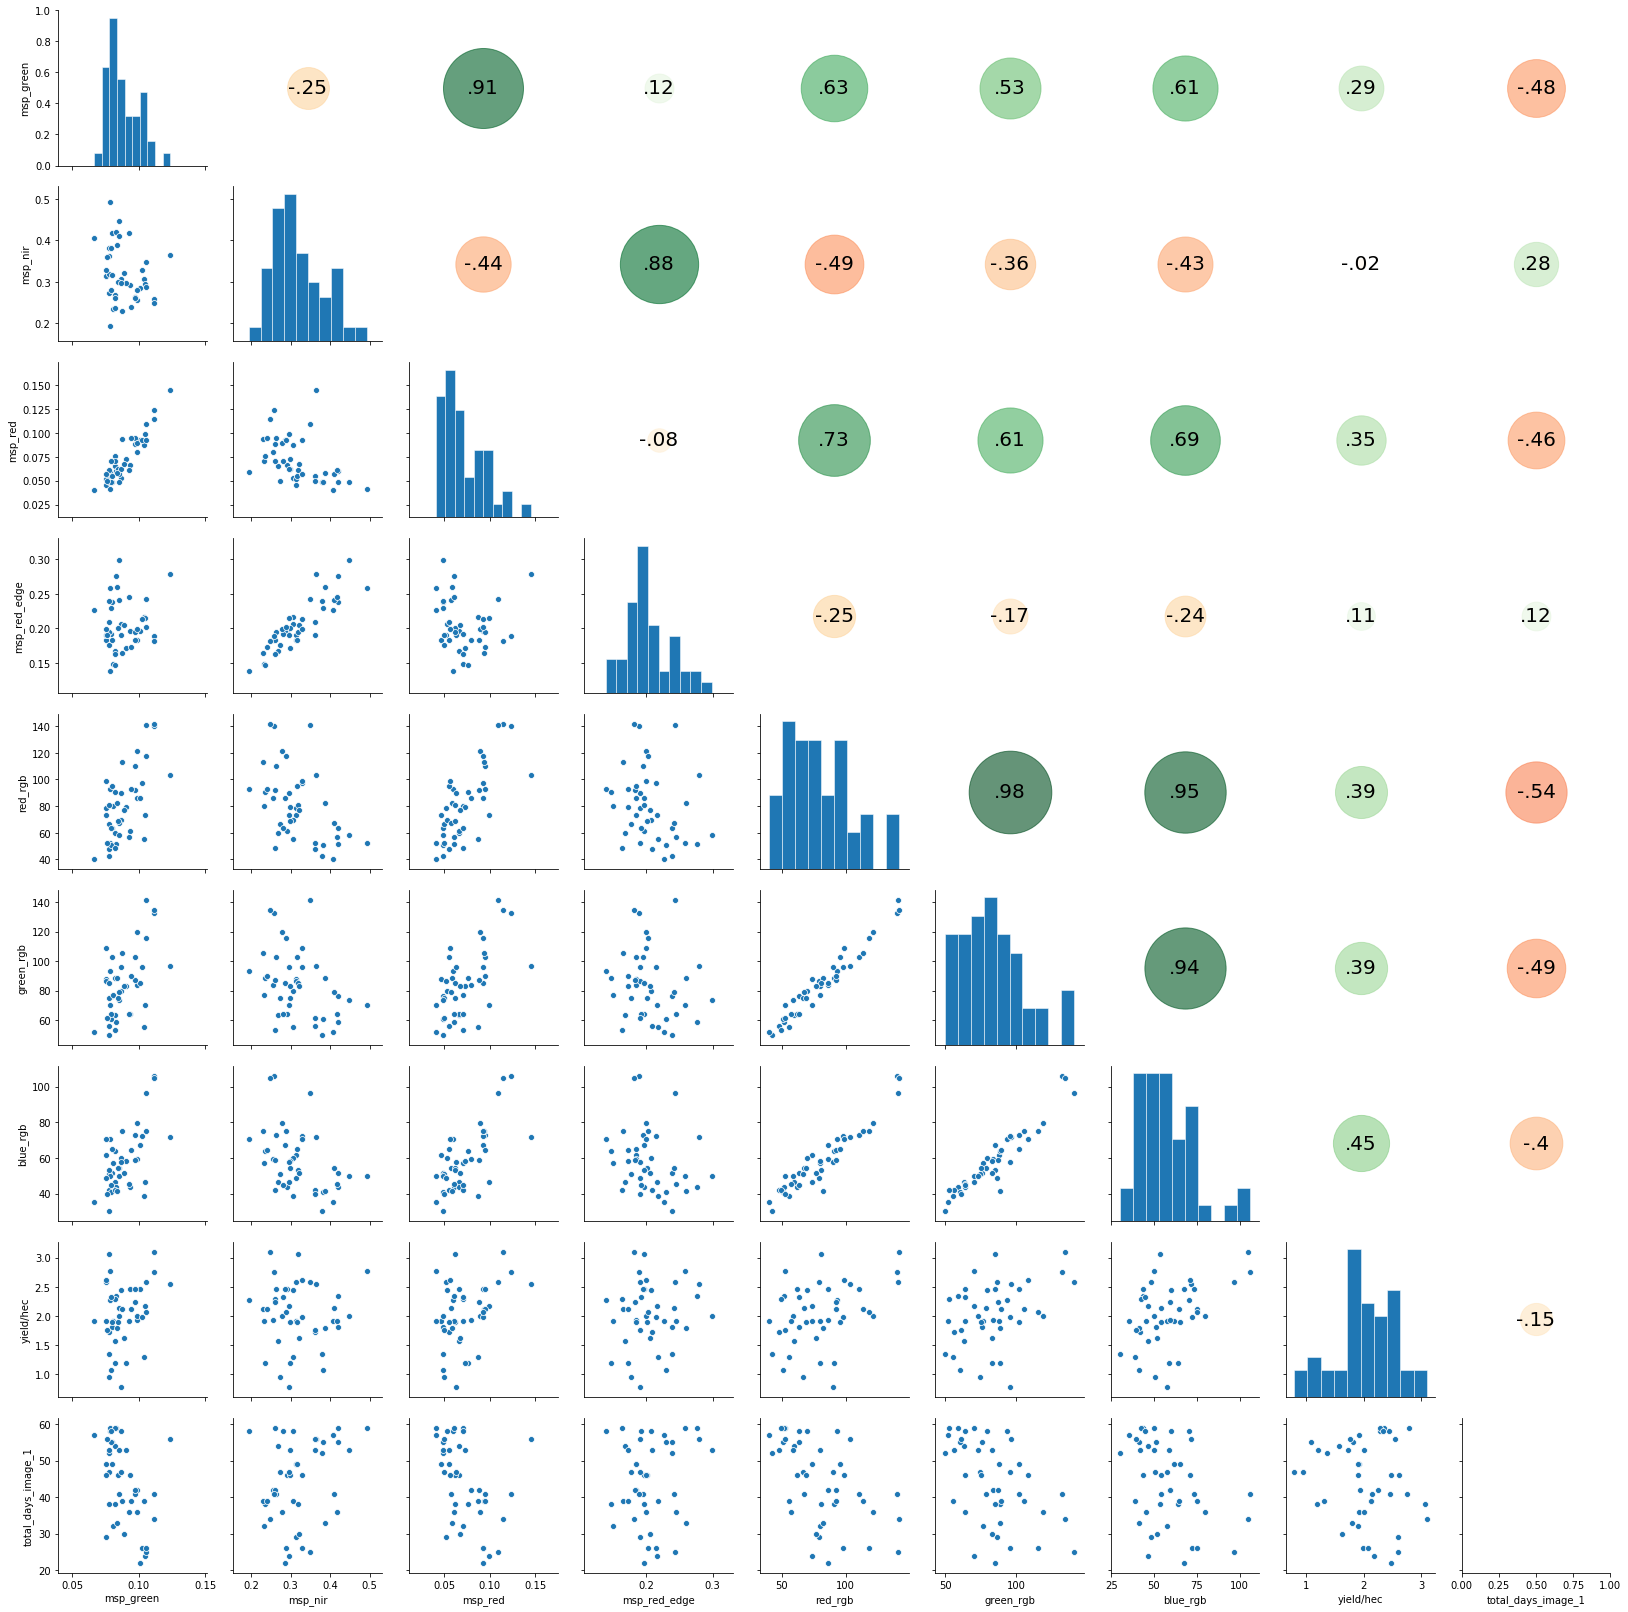

In [ ]:
g = sns.PairGrid(df_wo_ID, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(reg_coef)
g.map_diag(plt.hist,edgecolor='white', linewidth=0.5)

In [ ]:
# แยก features target
x = df[['msp_green','msp_nir','msp_red','msp_red_edge','red_rgb','green_rgb','blue_rgb','total_days_image_1']]
y = df[['yield/hec']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

[2.17998835]
[[-4.65070920e+01  2.84568888e+00  2.17027884e+01  4.18107467e+00
   8.51850881e-03 -2.72389476e-02  4.35333168e-02 -7.96965848e-03]]


In [ ]:
a = str(round(linear_reg.intercept_[0],4))+" + "
v = ['msp_green', 'msp_nir', 'msp_red', 'msp_red_edge', 'red_rgb',
       'green_rgb', 'blue_rgb', 'total_days_image_1']
for i in range(len(v)):
    a += str(round(linear_reg.coef_[0][i],4))+"*"+v[i] + " + "
print("linear equation = " +a[:-2])


linear equation = 2.18 + -46.5071*msp_green + 2.8457*msp_nir + 21.7028*msp_red + 4.1811*msp_red_edge + 0.0085*red_rgb + -0.0272*green_rgb + 0.0435*blue_rgb + -0.008*total_days_image_1 


linear equation = 2.18 + -46.5071* msp_green + 2.8457* msp_nir + 21.7028* msp_red + 4.1811* msp_red_edge + 0.0085* red_rgb + -0.0272* green_rgb + 0.0435* blue_rgb + -0.008*total_days_image_1

R^2 คือ  sum(y_hat-y_bar)^2 /sum(y-y_bar)^2 

In [ ]:
def regression_metrics(x, y, model):
  y_pred = model.predict(x)
  print('R2:', metrics.r2_score(y_true = y, y_pred= y_pred))
  print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [ ]:
regression_metrics(x_train, y_train, linear_reg)

R2: 0.4436430649953128
Mean Absolute Error: 0.3136273679909909
Mean Squared Error: 0.16563073441766368
Root Mean Squared Error: 0.40697756009104935


In [ ]:
regression_metrics(x_test, y_test, linear_reg)

R2: -5.5847965993534325
Mean Absolute Error: 0.5190410121294395
Mean Squared Error: 0.40038445328312067
Root Mean Squared Error: 0.6327593960449112


R2 เป็นลบ 
R2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative